<a href="https://colab.research.google.com/github/np02cs4a240117-art/AI/blob/master/2514120_AmitGangai_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

#Regression Task

Name : Amit Gangai <br>
Uni ID :2514120

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Detailed Description

**(a) When and by whom the dataset was created:**  
The dataset was created around 2020 by Aditya Desai, a data scientist who scraped the information from various UK-based used car trading websites. It was originally hosted on Kaggle as part of the "100,000 UK Used Car Dataset."

**(b) How and from where the dataset was accessed:**  
The dataset was accessed via the Kaggle platform, where it is publicly available for research and educational purposes. It was then uploaded as a CSV file (`ford.csv`) for this specific analysis.

**(c) Alignment with the chosen UNSDG:**  
This dataset aligns with the following UN Sustainable Development Goals:

- **SDG 13 (Climate Action):** Transportation is a major source of greenhouse gas emissions. Analyzing `mpg` (miles per gallon) and `fuelType` (Petrol, Diesel, Hybrid, Electric) helps monitor vehicle carbon footprints and the effectiveness of climate-related policies in the automotive industry.  
- **SDG 7 (Affordable and Clean Energy):** Tracks energy efficiency (`mpg`) and the shift from traditional combustion engines to cleaner alternatives, supporting Target 7.3 which aims to double the global rate of improvement in energy efficiency.

**(d) List of attributes (columns) with brief descriptions:**  

| Column        | Description |
|---------------|-------------|
| `model`       | Specific model name of the Ford vehicle (e.g., Fiesta, Focus). |
| `year`        | Year the vehicle was first registered. |
| `price`       | Listing price of the car in GBP (£). |
| `transmission`| Type of gearbox (Manual, Automatic, Semi-Auto). |
| `mileage`     | Total distance the car has been driven. |
| `fuelType`    | Energy source used (Petrol, Diesel, Hybrid, Electric). |
| `tax`         | Annual road tax (Vehicle Excise Duty) based on emissions. |
| `mpg`         | Miles per gallon; a measure of fuel efficiency. |
| `engineSize`  | Engine displacement volume in liters. |


## 3. Potential Questions for Analysis

1. **Fuel Efficiency Trends:**  
   How has the average fuel efficiency (`mpg`) of Ford vehicles changed from 2000 to 2020?  
   *Helps track progress toward energy efficiency goals.*

2. **Engine Size vs. Emissions:**  
   To what extent does a larger `engineSize` negatively correlate with `mpg` across different models?  
   *Identifies the environmental trade-offs for high-performance vehicles.*

3. **Market Shift to Clean Energy:**  
   What is the percentage growth of Hybrid and Electric vehicles compared to Diesel and Petrol models in recent years?  
   *Measures the rate of adoption of cleaner transportation technology.*

Load Dataset

In [15]:
df = pd.read_csv("/content/drive/MyDrive/ford.csvA")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Dataset Information

In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Check Missing Values

In [17]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Exploratory Data Analysis (EDA)

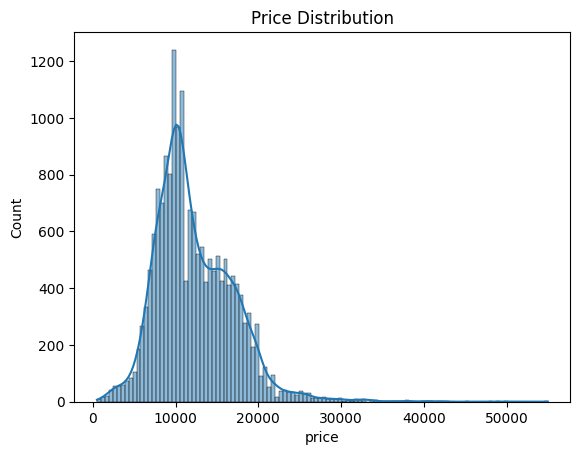

In [18]:
plt.figure()
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


<Axes: >

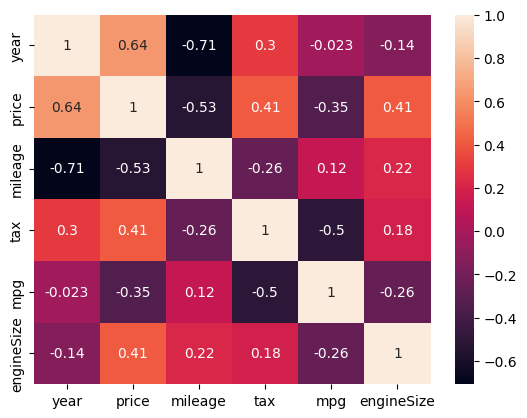

In [19]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

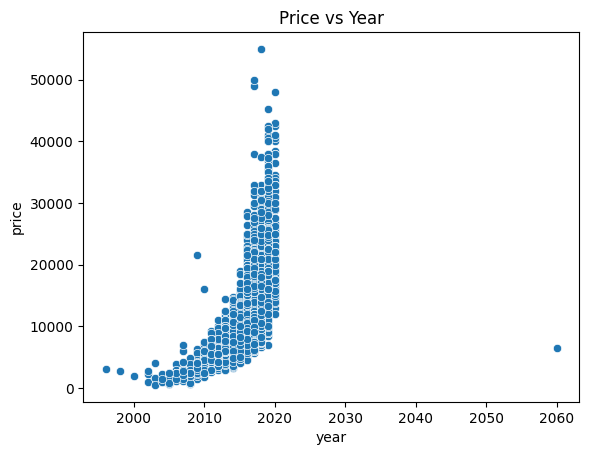

In [20]:
plt.figure()
sns.scatterplot(x="year", y="price", data=df)
plt.title("Price vs Year")
plt.show()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


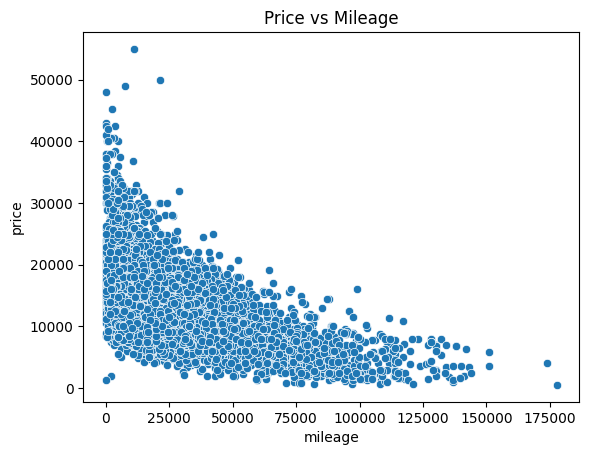

In [22]:
plt.figure()
sns.scatterplot(x="mileage", y="price", data=df)
plt.title("Price vs Mileage")
plt.show()

Feature / Target Split

In [23]:
X = df.drop("price", axis=1)
y = df["price"]

categorical_features = ["model", "transmission", "fuelType"]
numerical_features = ["year", "mileage", "tax", "mpg", "engineSize"]

Preprocessing Pipeline

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression Model

In [26]:
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType'])])),
                ('model', LinearRegression())])

Linear Regression Evaluation

In [27]:
lr_preds = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Results")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R2:", lr_r2)

Linear Regression Results
MAE: 1374.8117751807308
MSE: 3454992.0793356155
RMSE: 1858.7608989150851
R2: 0.8458422223598299


Random Forest Regressor

In [28]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType'])])),
                ('model', RandomForestRegressor(random_state=42))])

Random Forest Evaluation

In [29]:
rf_preds = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Results")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

Random Forest Results
MAE: 860.2784228111667
MSE: 1577265.5721520332
RMSE: 1255.8923409878862
R2: 0.9296242220624524


Cross Validation Scores

In [30]:
lr_cv = cross_val_score(lr_model, X_train, y_train, cv=5, scoring="r2")
rf_cv = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")

print("Linear Regression CV Score:", lr_cv.mean())
print("Random Forest CV Score:", rf_cv.mean())

Linear Regression CV Score: 0.837798476298536
Random Forest CV Score: 0.9260358772148847


Hyperparameter Tuning (Random Forest)

In [31]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)
grid.best_params_

{'model__max_depth': 20, 'model__n_estimators': 200}

Final Tuned Random Forest Model

In [32]:
best_rf = grid.best_estimator_

best_preds = best_rf.predict(X_test)

best_mae = mean_absolute_error(y_test, best_preds)
best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

print("Final Tuned Random Forest")
print("MAE:", best_mae)
print("RMSE:", best_rmse)
print("R2:", best_r2)


Final Tuned Random Forest
MAE: 843.3732018707212
RMSE: 1234.8897712455964
R2: 0.9319583602204446


Neural Network (MLP Regressor)

In [33]:
mlp_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=300,
        random_state=42
    ))
])

mlp_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300,
                              random_state=42))])

Neural Network Evaluation

In [34]:
mlp_preds = mlp_model.predict(X_test)

mlp_mae = mean_absolute_error(y_test, mlp_preds)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_preds))
mlp_r2 = r2_score(y_test, mlp_preds)

print("Neural Network Results")
print("MAE:", mlp_mae)
print("RMSE:", mlp_rmse)
print("R2:", mlp_r2)

Neural Network Results
MAE: 987.6609578440563
RMSE: 1376.237833314399
R2: 0.915490531572284


Final Comparison Table

In [35]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Network"],
    "MAE": [lr_mae, best_mae, mlp_mae],
    "RMSE": [lr_rmse, best_rmse, mlp_rmse],
    "R2 Score": [lr_r2, best_r2, mlp_r2]
})

final_results

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1374.811775,1858.760899,0.845842
1,Random Forest,843.373202,1234.889771,0.931958
2,Neural Network,987.660958,1376.237833,0.915491


FEATURE SELECTION + RE-TRAINING (NEW CELLS)

Train Random Forest for Feature Importance

In [36]:
# Train Random Forest without pipeline (for feature importance)
X_encoded = pd.get_dummies(X, drop_first=True)

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

rf_fs = RandomForestRegressor(random_state=42, n_estimators=150)
rf_fs.fit(X_train_enc, y_train_enc)

RandomForestRegressor(n_estimators=150, random_state=42)

Extract Feature Importance

In [37]:
importances = rf_fs.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(15)

,Feature,Importance
0,year,0.486422
4,engineSize,0.246564
1,mileage,0.071059
3,mpg,0.063891
17,model_ Kuga,0.031155
9,model_ Fiesta,0.021063
16,model_ Ka+,0.017151
19,model_ Mustang,0.012534
7,model_ Edge,0.011411
2,tax,0.006956


Feature Importance Plot

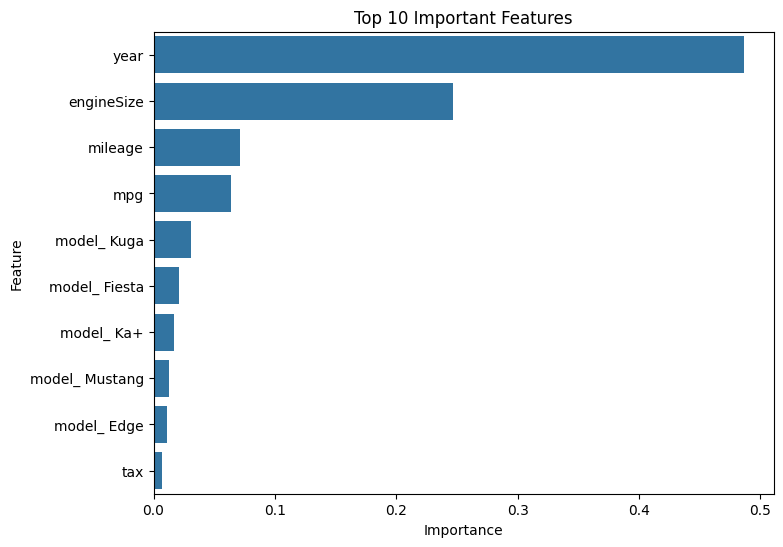

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Important Features")
plt.show()

Select Top Features

In [39]:
top_features = feature_importance_df.head(8)["Feature"].tolist()
top_features

['year',
 'engineSize',
 'mileage',
 'mpg',
 'model_ Kuga',
 'model_ Fiesta',
 'model_ Ka+',
 'model_ Mustang']

Create Reduced Dataset

In [40]:
X_selected = X_encoded[top_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

Train Linear Regression on Selected Features

In [41]:
lr_fs = LinearRegression()
lr_fs.fit(X_train_sel, y_train_sel)

lr_fs_preds = lr_fs.predict(X_test_sel)

lr_fs_mae = mean_absolute_error(y_test_sel, lr_fs_preds)
lr_fs_rmse = np.sqrt(mean_squared_error(y_test_sel, lr_fs_preds))
lr_fs_r2 = r2_score(y_test_sel, lr_fs_preds)

print("Linear Regression (After Feature Selection)")
print("MAE:", lr_fs_mae)
print("RMSE:", lr_fs_rmse)
print("R2:", lr_fs_r2)

Linear Regression (After Feature Selection)
MAE: 1601.3902557244205
RMSE: 2238.3225735748615
R2: 0.7764556313307126


Train Random Forest on Selected Features

In [42]:
rf_fs_final = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=20
)

rf_fs_final.fit(X_train_sel, y_train_sel)

rf_fs_preds = rf_fs_final.predict(X_test_sel)

rf_fs_mae = mean_absolute_error(y_test_sel, rf_fs_preds)
rf_fs_rmse = np.sqrt(mean_squared_error(y_test_sel, rf_fs_preds))
rf_fs_r2 = r2_score(y_test_sel, rf_fs_preds)

print("Random Forest (After Feature Selection)")
print("MAE:", rf_fs_mae)
print("RMSE:", rf_fs_rmse)
print("R2:", rf_fs_r2)

Random Forest (After Feature Selection)
MAE: 914.470558464836
RMSE: 1331.1402663501026
R2: 0.9209383222025632


Cross Validation (Selected Features)

In [43]:
rf_cv_fs = cross_val_score(
    rf_fs_final,
    X_train_sel,
    y_train_sel,
    cv=5,
    scoring="r2"
)

rf_cv_fs.mean()

np.float64(0.9152339887082634)

FINAL COMPARISON TABLE (MANDATORY)

In [44]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression (All Features)",
        "Random Forest (All Features)",
        "Linear Regression (Selected Features)",
        "Random Forest (Selected Features)"
    ],
    "MAE": [
        lr_mae,
        best_mae,
        lr_fs_mae,
        rf_fs_mae
    ],
    "RMSE": [
        lr_rmse,
        best_rmse,
        lr_fs_rmse,
        rf_fs_rmse
    ],
    "R2 Score": [
        lr_r2,
        best_r2,
        lr_fs_r2,
        rf_fs_r2
    ]
})

final_comparison

,Model,MAE,RMSE,R2 Score
0,Linear Regression (All Features),1374.811775,1858.760899,0.845842
1,Random Forest (All Features),843.373202,1234.889771,0.931958
2,Linear Regression (Selected Features),1601.390256,2238.322574,0.776456
3,Random Forest (Selected Features),914.470558,1331.140266,0.920938


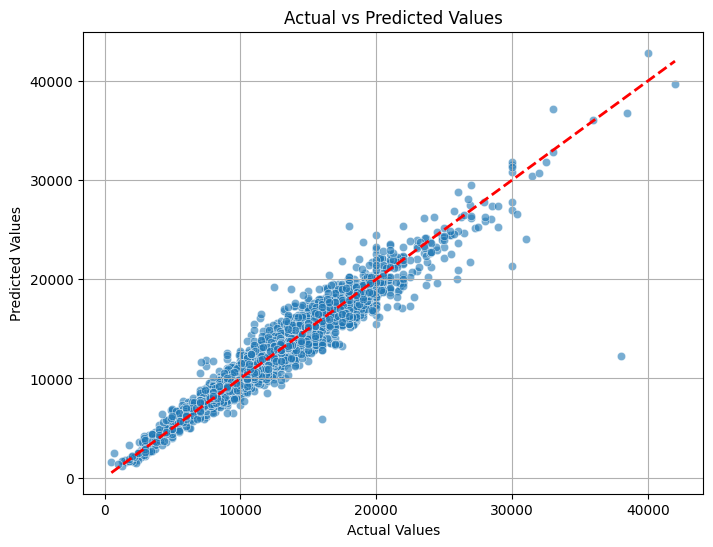

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Replace these with your actual test values and predictions
# y_test = actual target values from your test set
# y_pred = predicted values from your model

# For demonstration, let's assume Random Forest (All Features)
y_test = y_test  # Actual values
y_pred = best_preds  # Predicted values (replace with your model's predictions)

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()